In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from math import cos, sin, pi

import matplotlib.pyplot as plt

# Generate multivariate distributions

Generate random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. 

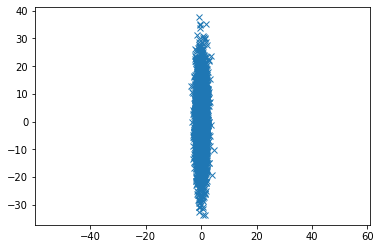

In [3]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.figure(1)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

--- end example ---

# Problem #1

Setting up the weights of each class

In [4]:
n = 200
piA = 3/4
piB = 1/4

nA = int(n*piA)
nB = int(n*piB)

Class 0: Gaussian mixture of two components

Component A:

Eigenvectors and eigenvalues

In [5]:
evec1 = np.transpose(np.array([1,0]))
evec2 = np.transpose(np.array([0,1]))
U = np.vstack((evec1, evec2))
print("U:" + str(U))
eval1 = 4
eval2 = 1
evals = np.array([eval1, eval2])
Lambda = np.diag(evals)
print("L:" + str(Lambda))

U:[[1 0]
 [0 1]]
L:[[4 0]
 [0 1]]


Covariance

In [6]:
C = U*Lambda*np.transpose(U)
print(C)

[[4 0]
 [0 1]]


Putting it all together for Component A

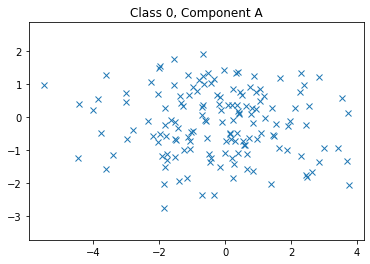

In [7]:
meanA = [0,0]
covA = C.T

xA, yA = np.random.multivariate_normal(meanA, covA, nA).T

plt.figure(1)

plt.plot(xA, yA, 'x')

plt.title('Class 0, Component A')
plt.axis('equal')
plt.show()

Component B

U:[[1 0]
 [0 1]]
L:[[1 0]
 [0 4]]
Covariance matrix: [[1 0]
 [0 4]]


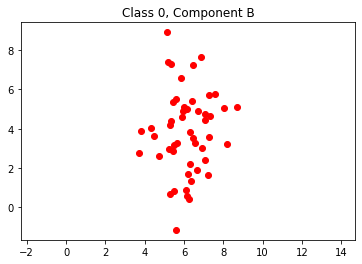

In [8]:
evec1 = np.transpose(np.array([1,0]))
evec2 = np.transpose(np.array([0,1]))
U = np.vstack((evec1, evec2))
print("U:" + str(U))
eval1 = 1
eval2 = 4
evals = np.array([eval1, eval2])
Lambda = np.diag(evals)
print("L:" + str(Lambda))

C = U*Lambda*np.transpose(U)

print("Covariance matrix: " + str(C))

meanB = [6,4]
covB = C.T

xB, yB = np.random.multivariate_normal(meanB, covB, nB).T

plt.figure(1)

plt.plot(xB, yB, 'o', c='red')

plt.title('Class 0, Component B')
plt.axis('equal')
plt.show()

## Class 0: Gaussian mixture of two components

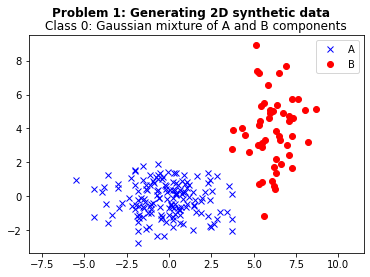

In [9]:
plt.figure(1)

plt.plot(xA, yA, 'x', c='blue', label='A')
plt.plot(xB, yB, 'o', c='red', label='B')

plt.suptitle('Problem 1: Generating 2D synthetic data', fontweight='bold')    
plt.title('Class 0: Gaussian mixture of A and B components')
plt.axis('equal')
plt.legend()

plt.show()

Write a function to generate Gaussian mixtures with two components

gaussian mixture = [number of samples, weight, [mean], [eigenvalue], [eigenvector1], [eigenvector2] ]

In [10]:
# number of samples
n = 200
# weights of each components
weightA = 2/3
weightB = 1/3
# mean
meanA = np.array([2, 3])
meanB = np.array([2, -2])
# theta
thetaA = pi/4
thetaB = pi/6
# eigenvalues 
eigvalA = np.array([1, 2])
eigvalB = np.array([4, 1])
# eigenvectors
eigvecA1 = np.array([cos(thetaA), sin(thetaA)])
eigvecA2 = np.array([-sin(thetaA), cos(thetaA)])
eigvecB1 = np.array([cos(thetaB), sin(thetaB)])
eigvecB2 = np.array([-sin(thetaB), cos(thetaB)])

eigvecA = np.vstack((eigvecA1, eigvecA2))
eigvecB = np.vstack((eigvecB1, eigvecB2))

g_mix1 = np.array([n, weightA, meanA, eigvalA, eigvecA], dtype='object')
g_mix2 = np.array([n, weightB, meanB, eigvalB, eigvecB], dtype='object')

g_mix = np.vstack((g_mix1, g_mix2))



def generate_gaussian_mixture(gauss_mix):
    
    # initialize list for distributions
    x = []
    y = []
    
    for g in gauss_mix:
        
        # step 0 - define number of samples to generate
        num_samples = int(g[0] * g[1])
        
        # step 1 - define U
        U = np.vstack((g[4][0].T, g[4][1].T))
        
        # step 2 - define Lambda
        Lambda = np.diag(g[3])
        
        # step 3 - compute C
        C = U * Lambda * U.T
        print("Covariance matrix: " + str(C))        
        C = C.astype('float64')
        
        # step 4 - correct for floating point negative errors
        #min_eig = np.min(np.real(np.linalg.eigvals(C)))
        #if min_eig < 0:
        #    print(min_eig)
        #    C -= 10*min_eig * np.eye(*C.shape)
            
        
        # step 4 - compute distribution
        xg, yg = np.random.multivariate_normal(g[2], C.T, num_samples).T
        
        x.append(xg)
        y.append(yg)
        
    x = np.asarray(x, dtype='object')
    y = np.asarray(y, dtype='object')
        
    return x, y

In [11]:
x, y = generate_gaussian_mixture(g_mix)

Covariance matrix: [[ 0.5 -0. ]
 [-0.   1. ]]
Covariance matrix: [[ 3.   -0.  ]
 [-0.    0.75]]


In [12]:
colors = ['red', 'blue']
labels = ['C', 'D']
markers = ['x', 'o']

plt.figure(1)

for i in range(np.shape(x)[0]):a

    plt.scatter(x[i], y[i], c=colors[i], marker=markers[i], label=labels[i])

plt.suptitle('Problem 1: Generating 2D synthetic data', fontweight='bold')    
plt.title('Class 1: Gaussian mixture of C and D components')
plt.axis('equal')
plt.legend()

plt.show()


IndentationError: unexpected indent (<ipython-input-12-e7464b8fe8c1>, line 9)

---

--- break space ---

---

# Appendix of random scripts

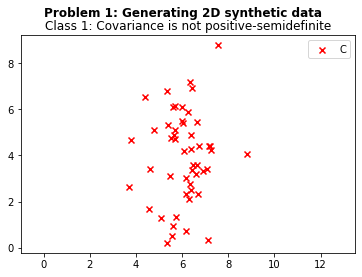

In [207]:
evec1 = np.transpose(np.array([1,0]))
evec2 = np.transpose(np.array([0,1]))
U = np.vstack((evec1, evec2))

eval1 = 1
eval2 = 4
evals = np.array([eval1, eval2])
Lambda = np.diag(evals)

C = U*Lambda*np.transpose(U)

meanB = [6,4]
covB = C.T

x, y = np.random.multivariate_normal(meanB, covB, nB).T



colors = ['red', 'blue']
labels = ['C', 'D']
markers = ['x', 'o']

plt.figure(1)

plt.scatter(x, y, c=colors[0], marker=markers[0], label=labels[0])

plt.suptitle('Problem 1: Generating 2D synthetic data', fontweight='bold')    
plt.title('Class 1: Covariance is not positive-semidefinite')
plt.axis('equal')
plt.legend()

plt.show()


---

# Final Answer

In [52]:

eps=1e-8

# define the number of samples
n = 200

# define the mean points for each of the synthetic cluster centers
mu_0a = [0,0]
mu_0b = [6,4]
mu_1c = [2,3]
mu_1d = [2,-2]

t_means = [mu_0a, mu_0b, mu_1c, mu_1d] 
# t_means shape: KxN where K is the number of components and N is number of dimensions (2)

# for each cluster center, create a positive semi definite covariance matrix
cov_0a = np.array([[4,0],[0,1]])
cov_0b = np.array([[1,0],[0,4]])
cov_1c = np.array([[0.5,0],[0,1]])
cov_1d = np.array([[3,0],[0,0.75]])
t_covs = [cov_0a, cov_0b, cov_1c, cov_1d]
# t_covs shape: KxNxN where the NxN is the covariance matrix of each component K.

# weights
weights = [3/4, 1/4, .67, 1/3]

XX = []
X = []
for mean, cov, w in zip(t_means, t_covs, weights):
    num_samples = int(n*w)
    x = np.random.multivariate_normal(mean, cov, num_samples) # create normal gaussian distributions
    X += list(x)                                      # stack points into dataset list
    XX.append(x)

X = np.array(X)                                       # make numpy array (speed)

## Plot the data

In [53]:
font = {'family' : 'Tahoma',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

colors = ['tab:blue', 'tab:blue', 'tab:green', 'tab:green', 'yellow', 'red', 'brown', 'grey']
ccolors = ['darkblue', 'darkblue', 'lime', 'lime']
ecolors = ['blue', 'blue', 'green', 'green']
labels = ['Class 0', 'Class 0', 'Class 1', 'Class 1']

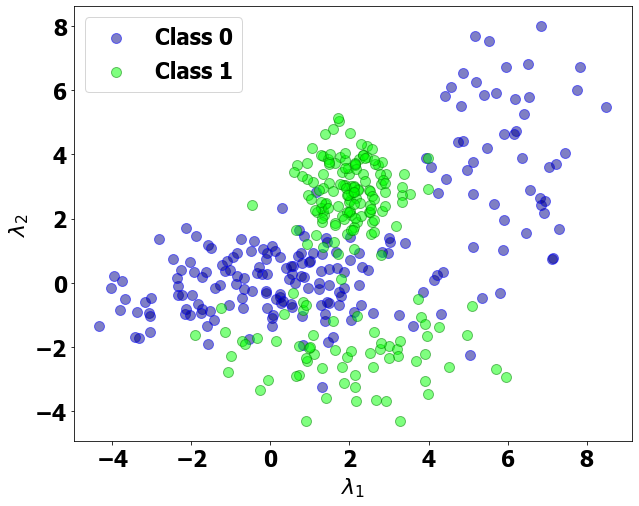

In [54]:
fig, ax = plt.subplots(figsize=(10,8))

for c in range(k):
    if c == 0 or c == 2:
        plt.scatter(XX[c][:,0], XX[c][:,1], color=ccolors[c], s=100, edgecolors=ecolors[c], marker='o', alpha=0.5, label=labels[c])
    else:
        plt.scatter(XX[c][:,0], XX[c][:,1], color=ccolors[c], s=100, edgecolors=ecolors[c], marker='o', alpha=0.5)
  
plt.xlabel(r'$\lambda_{1}$')
plt.ylabel(r'$\lambda_{2}$')

plt.legend()

plt.show()

---

In [58]:
print(np.shape(XX))

(4,)


In [59]:
XX_class0 = np.vstack((XX[0], XX[1]))
XX_class1 = np.vstack((XX[2], XX[3]))
print(np.shape(XX_class0))
print(np.shape(XX_class1))

XXc = np.vstack((XX_class0, XX_class1))

print("Ground truth data stacked by class: ", np.shape(XXc))

(200, 2)
(200, 2)
Ground truth data stacked by class:  (400, 2)


## Write datapoints to file

In [63]:
savePath = '/Users/mackenzie/Box/2020-2021/Classes/S21 ECE283 - Machine Learning/HW1/results/hw1prob1_datapoints.txt'
np.savetxt(savePath, XXc, fmt='%5f', delimiter=',')